In [1]:
import illustris_python as il
import numpy as np
import astropy as ap
import scipy as sp
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt

import h5py
import tqdm.notebook as tqdm

from holodeck import utils
from holodeck.constants import MSOL, PC, YR, MPC, GYR, SPLC
from holodeck import _PATH_DATA
import os

from holodeck.discrete import population, evolution
from holodeck import hardening,plot

import kalepy as kale
import holodeck as holo

## Using holodeck to import bh merger file

In [2]:
TNG100_merger_file_path = '/orange/lblecha/pranavsatheesh/illustris-mbh-data/L75n1820TNG/'
TNG100_merger_file_name = 'L75n1820TNG_blackhole-mergers.hdf5'


ill_merger_file_path = '/orange/lblecha/pranavsatheesh/illustris-mbh-data/L75n1820FP/'
ill_merger_file_name = 'L75n1820FP_blackhole-mergers.hdf5'

print("TNG-100:")
pop_TNG_bh = population.Pop_Illustris(basepath=TNG100_merger_file_path,fname=TNG100_merger_file_name,bh_merger_data_flag=True,min_BH_mass=5*1e6,min_DM=300,min_gas=100,min_star=100)

print("Illustris-1:")
pop_ill_bh = population.Pop_Illustris(basepath=ill_merger_file_path,fname=ill_merger_file_name,bh_merger_data_flag=True)

TNG-100:
Filtering black holes with mass > 5.0e+06 Msun...
Applying particle cuts: N(DM) > 300, N(gas) > 100, N(star) > 100
Number of valid mergers:6291
Illustris-1:
Filtering black holes with mass > 1.0e+06 Msun...
Applying particle cuts: N(DM) > 300, N(gas) > 100, N(star) > 100
Number of valid mergers:10973


In [3]:
pop_ill = population.Pop_Illustris(fname='galaxy-mergers_Illustris-1_gas-100_dm-100_star-100_bh-001.hdf5')

pop_tng_gal = population.Pop_Illustris(fname='galaxy-mergers_TNG100-1_gas-100_dm-100_star-100_bh-001.hdf5')

fname = /home/pranavsatheesh/mbhb_evolution/holodeck/holodeck/data/galaxy-mergers_Illustris-1_gas-100_dm-100_star-100_bh-001.hdf5
DEBUG: in population: self.scafa.min()=0.11634526, self.scafa.max()=1.0, np.median(self.scafa)=0.38398999
num with scafa=1: 25
gal_rads.min()=5.604741383306071e+21, gal_rads.max()=3.991318302684769e+23
self.sepa.min()=2.9670998035624385e+22, self.sepa.max()=4.588829976829252e+23
No zero-mass BHs found in this merger tree file!
self._use_mstar_tot_as_mbulge=False
self.mbulge.min()=4.097688561565048e+40, self.mbulge.max()=3.9210523650238056e+45
self.mstar_tot.min()=5.284912473673256e+40, self.mstar_tot.max()=5.84291502322986e+45
No zero-mass BHs found in this merger tree file!
12:11:11 WARNING : Redefining mass ratio to be always <= 1. [population.py:_init]
sample volume = 3.552e+79 [cgs] = 1.209e+06 [Mpc^3]; vol^(1/3) = 106.5 [Mpc]
Read 4279 mergers from file.
fname = /home/pranavsatheesh/mbhb_evolution/holodeck/holodeck/data/galaxy-mergers_TNG100-1_gas-100_d

/home/pranavsatheesh/mbhb_evolution/holodeck/holodeck/discrete/population.py:483: UserWarning: Redefining mass ratio to be always <= 1.
  warnings.warn(msg)


In [4]:
fix_time = 1.0 * GYR

fixed_TNG_bh = hardening.Fixed_Time_2PL.from_pop(pop_TNG_bh, fix_time)

fixed_time_ill = hardening.Fixed_Time_2PL.from_pop(pop_ill, fix_time)

fixed_time_tng_gal = hardening.Fixed_Time_2PL.from_pop(pop_tng_gal, fix_time)

In [5]:
evo_TNG_bh = evolution.Evolution(pop_TNG_bh, fixed_TNG_bh)
# for key, value in evo_TNG_bh.__dict__.items():
#     print(f"{key}: {value}")

evo_TNG_bh.evolve(progress=True)

evo_ill_bh = evolution.Evolution(pop_ill, fixed_time_ill)
evo_ill_bh.evolve(progress=True)

evo_tng_gal = evolution.Evolution(pop_ill, fixed_time_ill)
evo_tng_gal.evolve()

evolving binaries:   0%|          | 0/99 [00:01<?, ?it/s]

evolving binaries:   0%|          | 0/99 [00:00<?, ?it/s]

In [6]:
# for key, value in evo_TNG_bh.__dict__.items():
#     print(f"{key}: {value}")

In [7]:
# # Set timescale for all binaries to merge over
# fix_time = 3.0 * GYR

# fixed_ill_bh = hardening.Fixed_Time_2PL.from_pop(pop_ill_bh, fix_time)
# evo_ill_bh = evolution.Evolution(pop_ill_bh, fixed_ill_bh)
# # evolve binary population
# evo_ill_bh.evolve()

# fixed_ill = hardening.Fixed_Time_2PL.from_pop(pop, fix_time)
# evo_ill = evolution.Evolution(pop, fixed_ill)
# # evolve binary population
# evo_ill.evolve()

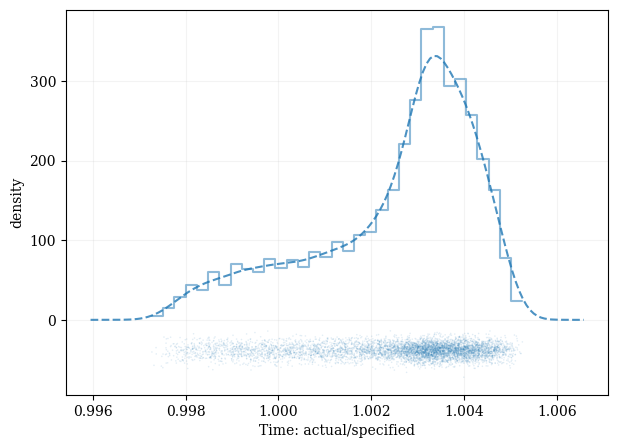

In [8]:
# Calculate the total lifetime of each binary
time = evo_TNG_bh.tlook
dt = time[:, 0] - time[:, -1]

# Create figure
fig, ax = plot.figax(scale='lin', xlabel='Time: actual/specified', ylabel='density')
# use kalepy to plot distribution
kale.dist1d(dt/fix_time, density=True)

plt.show()

In [9]:
# # Calculate the total lifetime of each binary
# time = evo_ill.tlook
# dt_ill = time[:, 0] - time[:, -1]

# time = evo_ill_bh.tlook
# dt_ill_bh = time[:, 0] - time[:, -1]

# # Create figure
# fig, ax = plot.figax(scale='lin', xlabel='Time: actual/specified', ylabel='density')
# # use kalepy to plot distribution
# kale.dist1d(dt_ill/fix_time, density=True,label="galaxy merger file")
# kale.dist1d(dt_ill_bh/fix_time, density=True,label="bh merger file")

# plt.legend()
# plt.show()

In [10]:
np.shape(evo_ill_bh.mass)

(4279, 100, 2)

In [11]:
np.ndim(evo_ill_bh.mass)

3

In [12]:
# evo_ill_bh._at__inputs('sepa',sepa, params=None,lin_interp=None )

In [13]:
sepa = np.logspace(-4, 4, 100) * PC
evo_ill_bh.at('sepa',sepa)
#evo_ill_bh.at('sepa',sepa,params=['sepa','tlook','dadt'])

{'mass': array([[[7.95491417e+39, 4.84243622e+41],
         [7.95491417e+39, 4.84243622e+41],
         [7.95491417e+39, 4.84243622e+41],
         ...,
         [7.95491417e+39, 4.84243622e+41],
         [7.95491417e+39, 4.84243622e+41],
         [7.95491417e+39, 4.84243622e+41]],
 
        [[1.69752327e+39, 4.84243622e+41],
         [1.69752327e+39, 4.84243622e+41],
         [1.69752327e+39, 4.84243622e+41],
         ...,
         [1.69752327e+39, 4.84243622e+41],
         [1.69752327e+39, 4.84243622e+41],
         [1.69752327e+39, 4.84243622e+41]],
 
        [[1.56044012e+39, 2.82528793e+39],
         [1.56044012e+39, 2.82528793e+39],
         [1.56044012e+39, 2.82528793e+39],
         ...,
         [1.56044012e+39, 2.82528793e+39],
         [1.56044012e+39, 2.82528793e+39],
         [1.56044012e+39, 2.82528793e+39]],
 
        ...,
 
        [[3.20096315e+38, 3.24182843e+38],
         [3.20096315e+38, 3.24182843e+38],
         [3.20096315e+38, 3.24182843e+38],
         ...,
         

### Hardening rates

In [14]:
def plot_evo(evo, freqs=None, sepa=None, ax=None):
    if (freqs is None) and (sepa is None):
        err = "Either `freqs` or `sepa` must be provided!"
        log.exception(err)
        raise ValueError(err)

    params_list=['sepa','tlook','dadt']

    if freqs is not None:
        data = evo.at('fobs', freqs)
        xx = freqs * YR
        xlabel = 'GW Frequency [1/yr]'
    else:
        data = evo.at('sepa', sepa,params=params_list)
        xx = sepa / PC
        xlabel = 'Binary Separation [pc]'

    if ax is None:
        fig, ax = plot.figax(xlabel=xlabel)
    else:
        fig = ax.get_figure()

    def _draw_vals_conf(ax, xx, vals, color=None, label=None):
        if color is None:
            color = ax._get_lines.get_next_color()
        if label is not None:
            ax.set_ylabel(label, color=color)
            ax.tick_params(axis='y', which='both', colors=color)
        # vals = np.percentile(vals, [25, 50, 75], axis=0) / units
        vals = utils.quantiles(vals, [0.25, 0.50, 0.75], axis=0).T
        h1 = ax.fill_between(xx, vals[0], vals[-1], alpha=0.25, color=color)
        h2, = ax.plot(xx, vals[1], alpha=0.75, lw=2.0, color=color)
        return (h1, h2)

    # handles = []
    # labels = []

    name = 'Hardening Time [yr]'
    vals = np.fabs(data['sepa'] / data['dadt']) / YR
    _draw_vals_conf(ax, xx, vals, label=name)
    # handles.append(hh)
    # labels.append(name)

    # name = 'eccen'
    # tw = ax.twinx()
    # hh, nn = _draw_vals_conf(tw, freqs*YR, name, 'green')
    # if hh is not None:
    #     handles.append(hh)
    #     labels.append(nn)

    # ax.legend(handles, labels)
    return fig

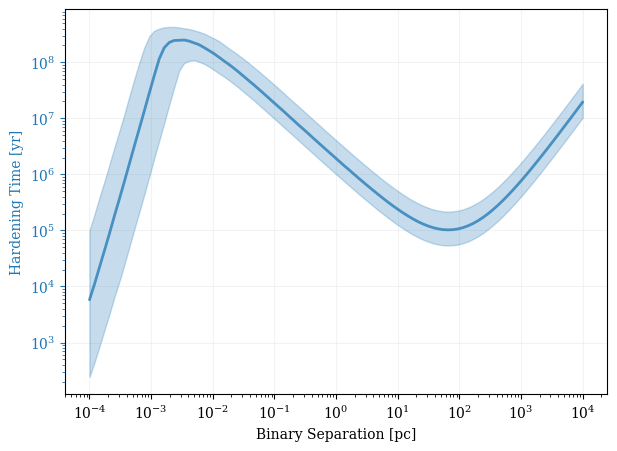

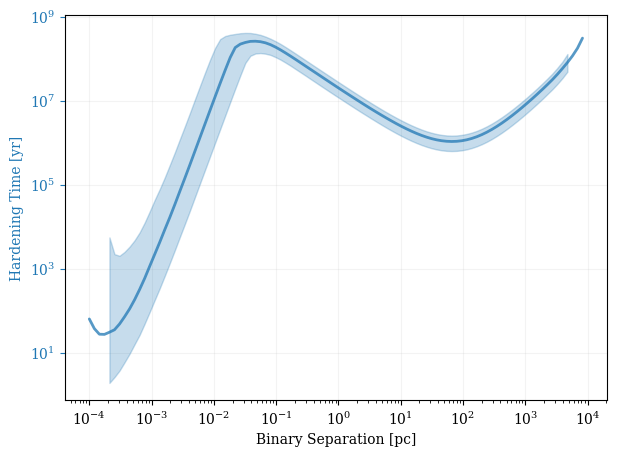

In [15]:
sepa = np.logspace(-4, 4, 100) * PC
# Plot hardening rates
plot_evo(evo_ill_bh, sepa=sepa)
plot_evo(evo_TNG_bh, sepa=sepa)
plt.show()

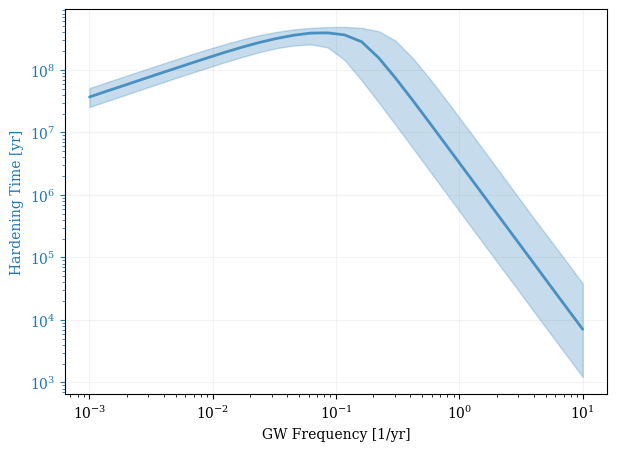

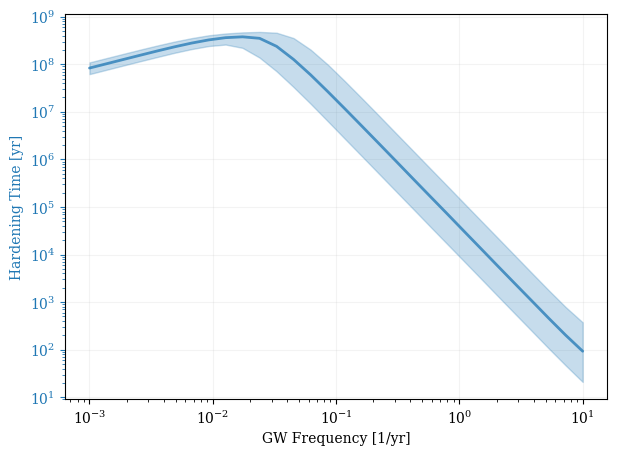

In [16]:
freqs = np.logspace(-3, 1, 30) / YR
# plot evolution
plot_evo(evo_ill_bh, freqs=freqs)
plot_evo(evo_TNG_bh, freqs=freqs)
plt.show()

### GWB

In [17]:
from holodeck import gravwaves

In [18]:
# construct sampling frequencies
fobs_cents, fobs_edges = holo.utils.pta_freqs(dur=20.0*YR, num=40)
# calculate discretized GW signals
gwb_ill = gravwaves.GW_Discrete(evo_ill_bh, fobs_cents, nreals=30)
gwb_ill.emit()

gwb_TNG_bh = holo.gravwaves.GW_Discrete(evo_TNG_bh, fobs_cents, nreals=30)
gwb_TNG_bh.emit()


gwb_TNG_gal = holo.gravwaves.GW_Discrete(evo_tng_gal, fobs_cents, nreals=30)
gwb_TNG_gal.emit()

GW frequencies:   0%|          | 0/40 [00:00<?, ?it/s]


DEBUG: fobs_gw=1.5844043907014474e-09

*** DEBUG *** mrat.min()=1.411803934785655e-05, 0.9999734189929549
temp.shape=(4240,), gwb_harms.shape=(1,), num_pois.shape=(4240, 30), both.shape=(30,), temp_to_sort.shape=(4240, 30)
idx_loud.shape=(4240, 30), loud.shape=(4240, 30)
mchirp.shape=(4240,), redz.shape=(4240,), (4240, 30)=
mchirp_loud.shape=(5, 30), redz_loud.shape=(5, 30)
loud.shape=(5, 30), mchirp_loud.shape=(5, 30), redz_loud.shape=(5, 30)
mchirp: min=1.237e+05, max=4.106e+09, med=2.358e+06
mchirp_loud: min=7.85e+08, max=4.106e+09, med=2.682e+09
mpri: min=1.422e+05, max=1.657e+10, med=5.294e+06
mpri_loud: min=1.566e+09, max=1.014e+10, med=3.893e+09
mrat: min=1.412e-05, max=1, med=0.4202
mrat_loud: min=0.238, max=0.9397, med=0.5948
redz: min=0.000297, max=5.835, med=1.416
redz_loud: min=0.08524, max=1.181, med=0.2532
sepa: min=0.001132, max=0.1386, med=0.006245
sepa_loud: min=0.05853, max=0.1134, med=0.08653

DEBUG: fobs_gw=3.168808781402895e-09

*** DEBUG *** mrat.min()=1.41180393

GW frequencies:   0%|          | 0/40 [00:00<?, ?it/s]


DEBUG: fobs_gw=1.5844043907014474e-09

*** DEBUG *** mrat.min()=0.0005550151376165378, 0.9999721549299657
temp.shape=(6021,), gwb_harms.shape=(1,), num_pois.shape=(6021, 30), both.shape=(30,), temp_to_sort.shape=(6021, 30)
idx_loud.shape=(6021, 30), loud.shape=(6021, 30)
mchirp.shape=(6021,), redz.shape=(6021,), (6021, 30)=
mchirp_loud.shape=(5, 30), redz_loud.shape=(5, 30)
loud.shape=(5, 30), mchirp_loud.shape=(5, 30), redz_loud.shape=(5, 30)
mchirp: min=4.673e+06, max=3.406e+09, med=6.158e+07
mchirp_loud: min=1.682e+08, max=3.406e+09, med=1.607e+09
mpri: min=5.656e+06, max=1.215e+10, med=2.385e+08
mpri_loud: min=2.377e+08, max=1.122e+10, med=4.244e+09
mrat: min=0.000555, max=1, med=0.1958
mrat_loud: min=0.0189, max=0.8437, med=0.3684
redz: min=2.306e-06, max=3.245, med=0.5603
redz_loud: min=0.0007698, max=0.2103, med=0.1089
sepa: min=0.005526, max=0.1299, med=0.0271
sepa_loud: min=0.04302, max=0.1293, med=0.09529

DEBUG: fobs_gw=3.168808781402895e-09

*** DEBUG *** mrat.min()=0.0005

GW frequencies:   0%|          | 0/40 [00:00<?, ?it/s]


DEBUG: fobs_gw=1.5844043907014474e-09

*** DEBUG *** mrat.min()=1.411803934785655e-05, 0.9999734189929549
temp.shape=(4240,), gwb_harms.shape=(1,), num_pois.shape=(4240, 30), both.shape=(30,), temp_to_sort.shape=(4240, 30)
idx_loud.shape=(4240, 30), loud.shape=(4240, 30)
mchirp.shape=(4240,), redz.shape=(4240,), (4240, 30)=
mchirp_loud.shape=(5, 30), redz_loud.shape=(5, 30)
loud.shape=(5, 30), mchirp_loud.shape=(5, 30), redz_loud.shape=(5, 30)
mchirp: min=1.237e+05, max=4.106e+09, med=2.358e+06
mchirp_loud: min=8.065e+07, max=4.106e+09, med=2.682e+09
mpri: min=1.422e+05, max=1.657e+10, med=5.294e+06
mpri_loud: min=9.954e+07, max=1.014e+10, med=3.893e+09
mrat: min=1.412e-05, max=1, med=0.4202
mrat_loud: min=0.238, max=0.9397, med=0.5948
redz: min=0.000297, max=5.835, med=1.416
redz_loud: min=0.0007526, max=1.181, med=0.2532
sepa: min=0.001132, max=0.1386, med=0.006245
sepa_loud: min=0.03234, max=0.1134, med=0.08653

DEBUG: fobs_gw=3.168808781402895e-09

*** DEBUG *** mrat.min()=1.41180

/tmp/ipykernel_1351643/691380689.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


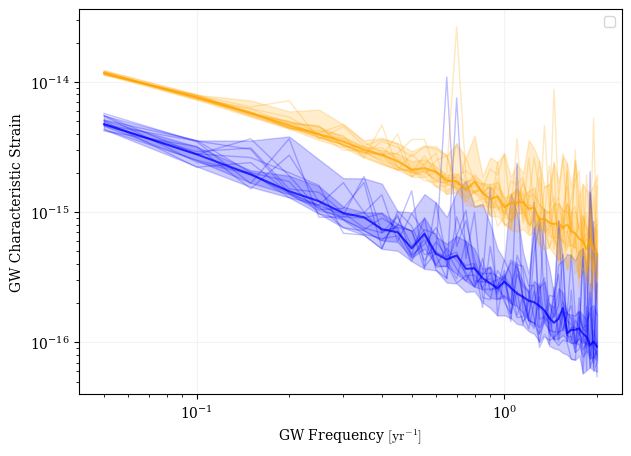

In [19]:
LABEL_GW_FREQUENCY_YR = r"GW Frequency $[\mathrm{yr}^{-1}]$"
LABEL_CHARACTERISTIC_STRAIN = r"GW Characteristic Strain"

fig, ax = plot.figax(
        xlabel=LABEL_GW_FREQUENCY_YR,
        ylabel=LABEL_CHARACTERISTIC_STRAIN
    )

fig2 = plot.draw_gwb(ax,fobs_cents*YR, gwb_TNG_gal.back, label='Illustris-1', color='blue')
fig3 = plot.draw_gwb(ax,fobs_cents*YR, gwb_TNG_bh.back, label='TNG-100', color='orange')
ax.legend()
plt.show()


In [20]:
# construct sampling frequencies
fobs_cents, fobs_edges = holo.utils.pta_freqs(dur=20.0*YR, num=40)
# calculate discretized GW signals
gwb = holo.gravwaves.GW_Discrete(evo_TNG_bh, fobs_cents, nreals=30)
gwb.emit()

GW frequencies:   0%|          | 0/40 [00:00<?, ?it/s]


DEBUG: fobs_gw=1.5844043907014474e-09

*** DEBUG *** mrat.min()=0.0005550151376165378, 0.9999721549299657
temp.shape=(6021,), gwb_harms.shape=(1,), num_pois.shape=(6021, 30), both.shape=(30,), temp_to_sort.shape=(6021, 30)
idx_loud.shape=(6021, 30), loud.shape=(6021, 30)
mchirp.shape=(6021,), redz.shape=(6021,), (6021, 30)=
mchirp_loud.shape=(5, 30), redz_loud.shape=(5, 30)
loud.shape=(5, 30), mchirp_loud.shape=(5, 30), redz_loud.shape=(5, 30)
mchirp: min=4.673e+06, max=3.406e+09, med=6.158e+07
mchirp_loud: min=6.137e+08, max=3.406e+09, med=1.607e+09
mpri: min=5.656e+06, max=1.215e+10, med=2.385e+08
mpri_loud: min=1.098e+09, max=1.122e+10, med=4.244e+09
mrat: min=0.000555, max=1, med=0.1958
mrat_loud: min=0.0189, max=0.7984, med=0.3684
redz: min=2.306e-06, max=3.245, med=0.5603
redz_loud: min=0.01251, max=0.2103, med=0.1089
sepa: min=0.005526, max=0.1299, med=0.0271
sepa_loud: min=0.06518, max=0.1293, med=0.09529

DEBUG: fobs_gw=3.168808781402895e-09

*** DEBUG *** mrat.min()=0.000555

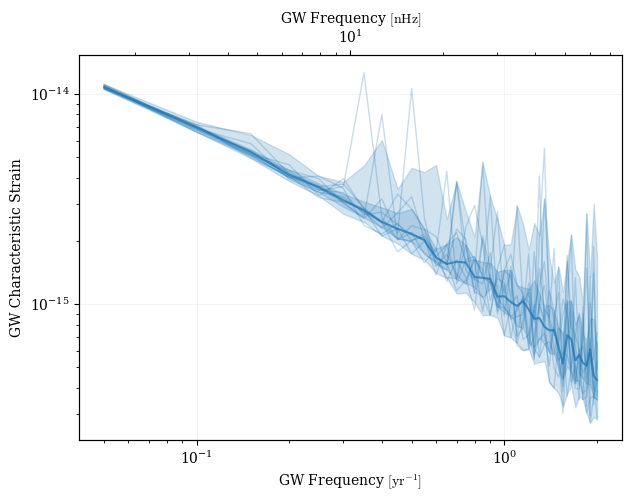

In [ ]:
plot.plot_gwb(fobs_cents, gwb.back)
plt.show()